In [52]:
# 라이브러리를 로드하는 함수들입니다
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [53]:
#데이터를 읽어오는 함수입니다. read_csv 함수 안에는 csv 파일 경로를 작성해야하는데, 길어지면 헷갈리니 같은 폴더 안에 csv 파일을 위치시켜주세요!
data = pd.read_csv('student_lifestyle_dataset.csv')
#데이터를 미리 열람하는 코드입니다. 해당 데이터를 통해 어떤 데이터를 전처리해야할 지 파악할 수 있습니다.
data.head(10)

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
5,6,6.0,2.1,8.0,0.3,7.6,2.85,Moderate
6,7,8.0,0.7,5.3,5.7,4.3,3.08,High
7,8,8.4,1.8,5.6,3.0,5.2,3.20,High
8,9,5.2,3.6,6.3,4.0,4.9,2.82,Low
9,10,7.7,0.7,9.8,4.5,1.3,2.76,Moderate


In [54]:
# encoder를 통한 전처리 단계입니다. label encoder은 열에 존재하는 값을 숫자로 바꾸어주는 인코더입니다.
# M-> 0, F-> 1 이런식으로 고유한 문자열 값을 숫자로 치환합니다.
label_encoder = LabelEncoder()
# 'Stress_Level'열을 숫자형으로 인코딩합니다.
data['Stress_Level_Encoded'] = label_encoder.fit_transform(data['Stress_Level'])

In [ ]:
# 입력 변수(features)와 타겟 변수(target)를 정의하는 단계입니다.
features = [
    'Study_Hours_Per_Day',
    'Extracurricular_Hours_Per_Day',
    'Sleep_Hours_Per_Day',
    'Social_Hours_Per_Day',
    'Physical_Activity_Hours_Per_Day',
    'GPA'
]
# 입력으로 줄 X 값과 정답값인 y를 분리합니다.
X = data[features]
y = data['Stress_Level_Encoded']

In [ ]:
# 모델을 학습시킬 데이터와 모델을 평가할 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

In [ ]:
# 사용할 모델을 선언하고 학습시킵니다. 여기에서는 분류 모델 중 하나인 결정 트리를 이용했습니다!
dt_model = DecisionTreeClassifier(random_state=2024)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2024)

In [58]:
# 결정트리 모델의 정확도, 분류 개수를 시각화 하는 코드입니다.
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# 결과 출력
print("결정 트리 성능 평가:")
print(f"정확도(Accuracy): {accuracy:.4f}")
print("\n분류 리포트(Classification Report):")
print(classification_report(y_test, y_pred))

결정 트리 성능 평가:
정확도(Accuracy): 1.0000

분류 리포트(Classification Report):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       1.00      1.00      1.00        89
           2       1.00      1.00      1.00       207

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [ ]:
# 이번에는 또다른 분류 모델 중 하나인 랜덤 포레스트를 이용했습니다!
rf_model = RandomForestClassifier(n_estimators=100, random_state=2024)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=2024)

In [60]:
# 랜덤 포레스트 모델의 정확도, 분류 개수를 시각화 하는 코드입니다.
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# 결과 출력
print("랜덤 포레스트 성능 평가:")
print(f"정확도(Accuracy): {accuracy:.4f}")
print("\n분류 리포트(Classification Report):")
print(classification_report(y_test, y_pred))

랜덤 포레스트 성능 평가:
정확도(Accuracy): 1.0000

분류 리포트(Classification Report):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       1.00      1.00      1.00        89
           2       1.00      1.00      1.00       207

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



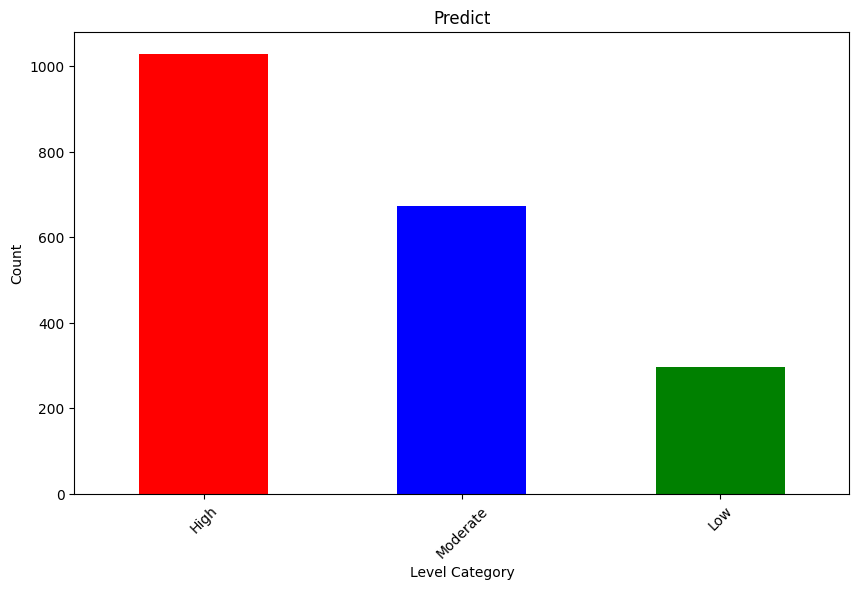

In [ ]:
# Category별로 얼마나 존재하는지를 시각화하는 코드입니다.
category_data_label = data['Stress_Level'].value_counts()
colors=['red', 'blue', 'green']
plt.figure(figsize=(10, 6))
category_data_label.plot(kind='bar', color=colors)
plt.title('Predict')
plt.xlabel('Level Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

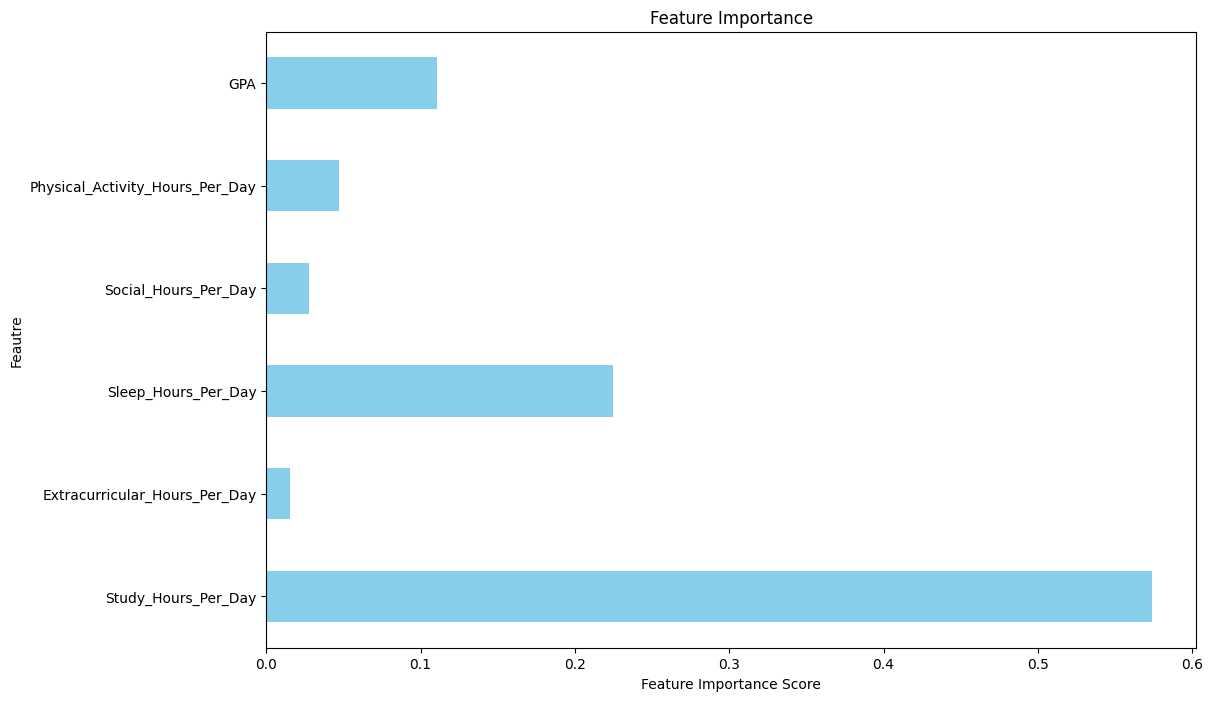

In [64]:
#예측할 때, Feature가 얼마나 영향을 주는지 보여주는 코드입니다.
importance = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 8))
importance.plot(kind='barh', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feautre')
plt.show()